# Model Evaluation and Improvement

In this chapter two new concepts are introduced:
* Cross-validation 
* Grid search

##### Index:
* Cross-Validation
    * Stratified Cross-Validation
    * Leave-One-Out Cross-Validation
    * Shuffle-Split Cross-Validation
    * Cross-Validation with groups

In [1]:
import pandas as pd
import numpy as np
import mglearn
import IPython.display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Cross-Validation

A way to test generalization that is more robust than just splitting into training and test sets.

In Cross-Validation the data is splitted and trained repeatedly. 


The most famous one is the k-fold validation. The data is splitted into a set number of folds and then the first fold is used for testing and the rest for training, then the second and so on. 

In the end we have several accuracy values.

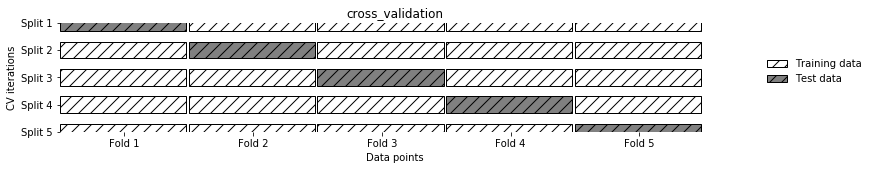

In [2]:
mglearn.plots.plot_cross_validation()

We apply cross validation with cross_val_score

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris['data'], iris['target'])
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


It returned the score of three folds as a default, but we can change that with cv parameter.

In [4]:
scores = cross_val_score(logreg, iris['data'], iris['target'], cv = 5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


Computing the mean is an easy way to summarize the results for cross-validation

In [5]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


Another option for doing cross-validation is the cross_validate method

In [6]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.00099707, 0.0009985 , 0.00099659, 0.        , 0.00199461]),
 'score_time': array([0.00099707, 0.        , 0.        , 0.0009985 , 0.        ]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [7]:
# With pandas we can display everything nicely
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.000997,0.000997,1.000000,0.950000
1,0.000998,0.000000,0.966667,0.966667
2,0.000997,0.000000,0.933333,0.966667
3,0.000000,0.000998,0.900000,0.975000
4,0.001995,0.000000,1.000000,0.958333


Mean times and scores:
 fit_time       0.000997
score_time     0.000399
test_score     0.960000
train_score    0.963333
dtype: float64


##### Benefits of Cross- Validation

If we only do a train_test_split we might get good or bad luck by having certain elements in the train set. With cross-validation this is solved.

The purpose of cross-validation is not to build a model, but to evaluate how well a given algorithm will generalize when trained on a specific dataset.

## Stratified cross-validation

While doing classification it is better to use stratified cross-validation in order to avoid stuff like having only one class in a single fold.

If 90% of the data belongs to A and 10% to B, then the resulting folds will have 90% A and 10%B as well.

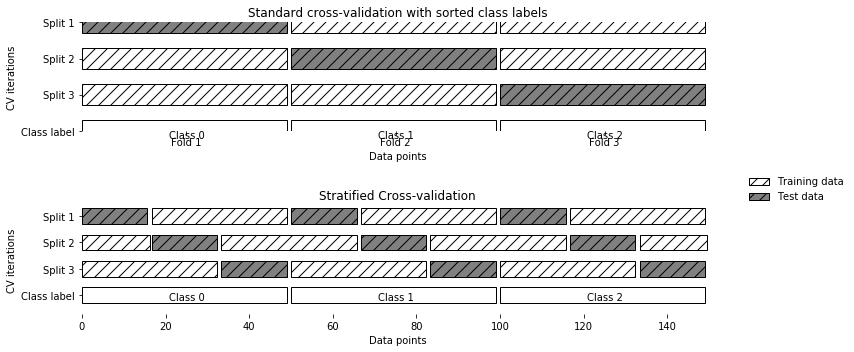

In [8]:
mglearn.plots.plot_stratified_cross_validation()

We can get more control on the cross-validation with KFold class

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [11]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


Insted of stratifying we could shuffle the dataset so there are no folds with only a single class by using KFold class.

In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


## Leave-One-Out Cross-Validation

You split the data into folds and use a single datapoint for testing the model.

It can provide good estimates on small datasets

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


## Shuffle-Split Cross-Validation

It splits the data into a specified number of folds, then it trains train_size many points and tests on test_size many points and the splitting is repeated n_split times.

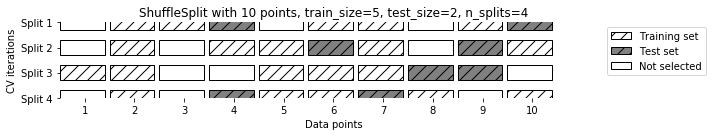

In [14]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.90666667 0.93333333 0.8        0.89333333 0.96       0.97333333
 0.98666667 0.97333333 0.90666667 0.89333333]


#### Note:
There is a classification variant called StratifiedShuffleSplit

## Cross-Validation with groups

